In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from fredapi import Fred
from GetAPI import get_keys

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

secrets = get_keys('~/.secret/api-key.json')
fred_key = secrets['fred-api']
fred = Fred(api_key=fred_key)


In [ ]:
house_df = fred.search('New Private Housing Units', filter=('frequency','Monthly'))
# house_df.head()

In [ ]:
house_df= house_df.query('seasonal_adjustment == "Seasonally Adjusted" and title.str.contains("Authorized by Building Permits") and id.str.contains("BPPRIVSA")')
house_df = house_df[house_df['id'].str.len() < 11]
house_id_to_state = house_df['id'].str.replace('BPPRIVSA','').to_dict()
#house_df.head()
all_results = []

for myid in house_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
house_states = pd.concat(all_results, axis=1)

In [3]:
house_states.columns = [house_id_to_state[c] for c in house_states.columns]

px.line(house_states)

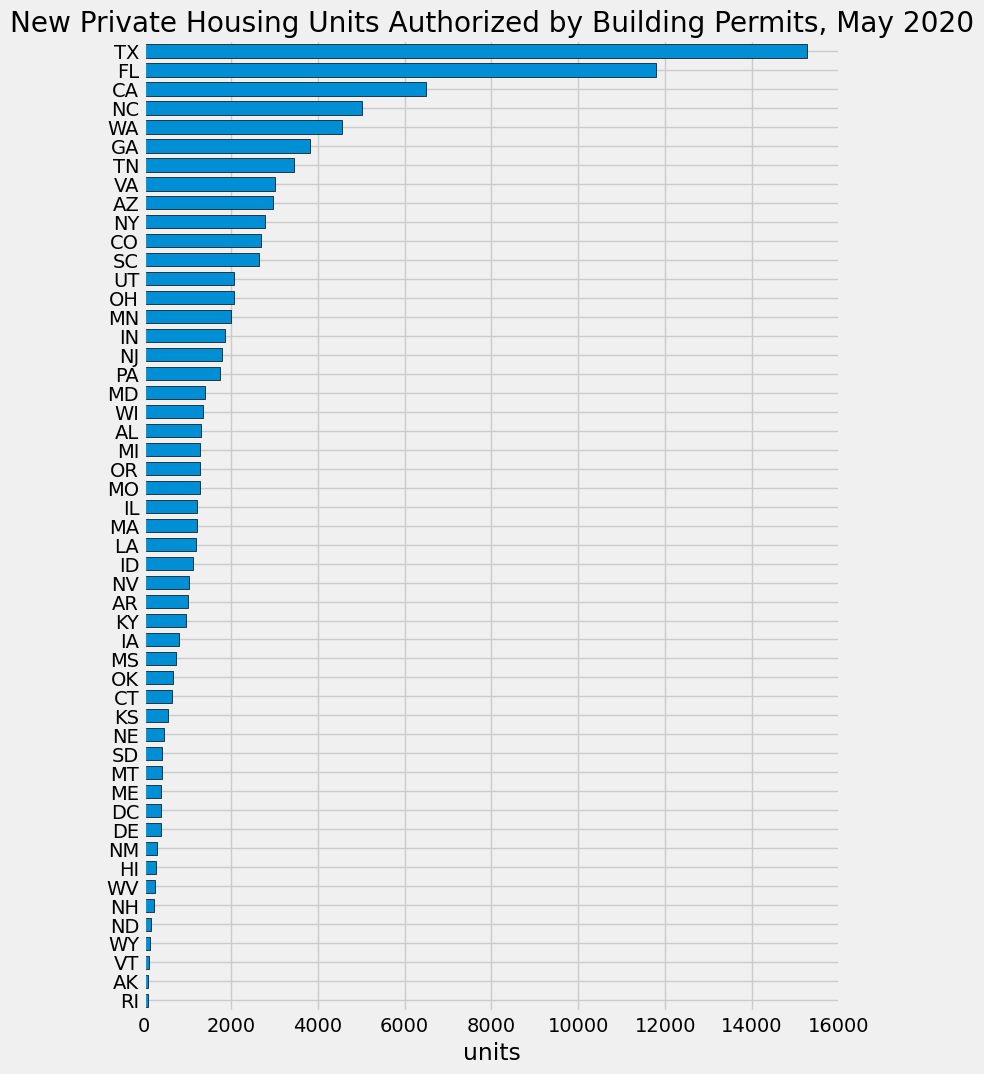

In [45]:


ax = house_states.loc[house_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='New Private Housing Units Authorized by Building Permits, May 2020')
ax.legend().remove()
ax.set_xlabel('units')
plt.show()

In [5]:
house_ca = fred.get_series(series_id='CABPPRIVSA')
house_ca.head()


1988-01-01    16466.483109
1988-02-01    19704.378621
1988-03-01    19420.945694
1988-04-01    21148.677854
1988-05-01    19129.807991
dtype: float64

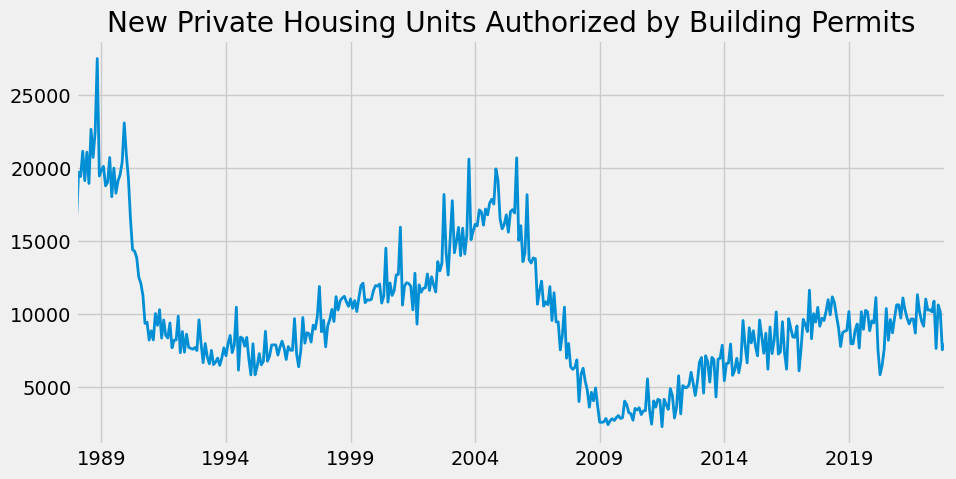

In [6]:
house_ca.plot(figsize=(10, 5), title='New Private Housing Units Authorized by Building Permits', lw=2)
plt.show()